In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys;src_dir = os.path.join(os.getcwd(), os.pardir, 'src');sys.path.append(src_dir)

In [2]:
from data.dal import DAL
import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.ensemble
import sklearn.naive_bayes
import xgboost
import tqdm
import sklearn.neighbors
from sklearn.decomposition import PCA
import visualization
import warnings
import pickle
warnings.filterwarnings('ignore')

In [4]:
split = DAL("split.hdf")
labels = split.overview()
labels["correct"] = labels.execution_type == 1

In [5]:
featuresdal = DAL("features.hdf")
features = featuresdal.get("tsfresh_raw_min")
features = features[[c for c in features.columns]]
X = features.values

In [17]:
sets = [int(x.replace("skeleton_","")) //100 for x in labels.df_key]
cv2 = lambda : sklearn.model_selection.GroupKFold(10).split(X,groups=sets)
cv3 = lambda : sklearn.model_selection.GroupKFold(10).split(X,groups=labels.person)

In [19]:
scores = {}

clfs = [('Logistic regression',sklearn.linear_model.LogisticRegression()),
                ('Decision tree',sklearn.tree.DecisionTreeClassifier()),
                ('Naive Bayes',sklearn.naive_bayes.GaussianNB()),
                ('Random forest',sklearn.ensemble.RandomForestClassifier()),
                ('XGBoost',xgboost.XGBClassifier())]

results = []
for t in ["exercise","correct","execution_type"]:
    y = labels[t].values
    exercisetrans = sklearn.preprocessing.LabelEncoder()
    y = exercisetrans.fit_transform(y)
    for cvname,cv in [("Leave-one-set-out CV",cv2),
                    ("Leave-one-subject-out CV",cv3)]:
        for clfname,clf in clfs:
            scores = sklearn.model_selection.cross_validate(clf,X,y,cv=cv(),return_train_score=True)
            result = (t,cvname,clfname,scores)
            print(result)
            results.append(result)

with open('../data/resultsQ1.pkl','wb') as fh:
    pickle.dump(results,fh)

('exercise', 'Leave-one-set-out CV', 'Logistic regression', {'fit_time': array([0.12500238, 0.12126589, 0.11223483, 0.1149261 , 0.12800169,
       0.12912202, 0.1312151 , 0.12076926, 0.12971807, 0.10727692]), 'score_time': array([0.02610588, 0.00029206, 0.00028324, 0.00029206, 0.00029325,
       0.0002811 , 0.00028563, 0.00029731, 0.00029111, 0.00030208]), 'test_score': array([1.        , 1.        , 1.        , 1.        , 0.99435028,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])})
('exercise', 'Leave-one-set-out CV', 'Decision tree', {'fit_time': array([0.08747888, 0.08555603, 0.10616446, 0.08629107, 0.09305954,
       0.07809067, 0.0775485 , 0.08509135, 0.08698678, 0.0845983 ]), 'score_time': array([0.0001893 , 0.00018358, 0.00028443, 0.00017786, 0.00017643,
       0.00017929, 0.00017357, 0.00017285, 0.00021863, 0.00018001]), 'test_score': array([1.        , 0.98901099, 0.98351648, 1.        , 0.98

('correct', 'Leave-one-set-out CV', 'XGBoost', {'fit_time': array([1.18321013, 1.15599632, 1.1607182 , 1.17345643, 1.17607737,
       1.16822076, 1.18341088, 1.18651009, 1.185009  , 1.1488831 ]), 'score_time': array([0.0009532 , 0.00090694, 0.00090194, 0.00091553, 0.00089765,
       0.00141144, 0.00089765, 0.00090075, 0.00089717, 0.0009017 ]), 'test_score': array([0.8021978 , 0.73626374, 0.88461538, 0.88333333, 0.8079096 ,
       0.76704545, 0.83522727, 0.5625    , 0.76136364, 0.86338798]), 'train_score': array([0.99067164, 0.99253731, 0.98756219, 0.9863354 , 0.98698078,
       0.99008674, 0.99070632, 0.98946716, 0.98760843, 0.98817673])})
('correct', 'Leave-one-subject-out CV', 'Logistic regression', {'fit_time': array([0.63478851, 0.71826315, 0.88614631, 0.63155198, 0.70384169,
       0.74066377, 0.68746948, 0.69109321, 0.78899789, 0.80260921]), 'score_time': array([0.00034809, 0.00033784, 0.00032949, 0.00034404, 0.0003345 ,
       0.00033569, 0.00034118, 0.00033355, 0.00035071, 0.00

('execution_type', 'Leave-one-subject-out CV', 'Random forest', {'fit_time': array([0.09927249, 0.0990386 , 0.10091305, 0.10011292, 0.09515214,
       0.09945893, 0.10102272, 0.09980273, 0.10104918, 0.10149336]), 'score_time': array([0.00090432, 0.00087309, 0.00083208, 0.00085402, 0.0008049 ,
       0.00087595, 0.00082326, 0.00083256, 0.00086188, 0.00091386]), 'test_score': array([0.77659574, 0.80645161, 0.67582418, 0.66850829, 0.62777778,
       0.52808989, 0.67613636, 0.58285714, 0.71676301, 0.69590643]), 'train_score': array([0.99563046, 0.99438903, 0.99875622, 0.99689248, 0.99565217,
       0.99565757, 0.99380421, 0.99566563, 0.99938157, 0.99752934])})
('execution_type', 'Leave-one-subject-out CV', 'XGBoost', {'fit_time': array([4.97785497, 4.98138714, 5.05141234, 5.03081441, 5.05674076,
       4.98446417, 4.97841692, 5.05590057, 5.07704663, 4.98260665]), 'score_time': array([0.00237799, 0.00246096, 0.00243998, 0.00235844, 0.00237465,
       0.00225949, 0.00224805, 0.00231838, 0.00

In [3]:
with open('../data/resultsQ1.pkl','rb') as fh:
    results = pickle.load(fh)
    print(len(results))

30


In [29]:
import scipy.stats as stats

res = pd.DataFrame(results,columns=["y","clf","cv","scores"])

def summarize(scores):
    s = scores["test_score"]
    lo,hi = stats.t.interval(alpha = 0.95,              # Confidence level
                 df= len(s)-1,                    # Degrees of freedom
                 loc = s.mean(),         # Sample mean
                 scale = s.std())
    return s.mean()#"%.3f pm %.3f" % ((lo+hi)/2,(hi-lo)/2)

def t(y):
    if y == "exercise":
        return "t1"
    if y == "correct":
        return "t2"
    if y == "execution_type":
        return "t3"
def shortcv(cv):
    if cv == "Leave-one-set-out CV":
        return "$CV_{set}$"
    if cv == "Leave-one-subject-out CV":
        return "$CV_{subject}$"
    
res["t"] = res.y.apply(t)
res["scores"] = res.scores.apply(summarize)
res["shortcv"] = res.cv.apply(shortcv)

#res = res[res.y == "execution_type"]
#res.pivot(index=0,columns=1,values=2)
#print(res.pivot(index="clf",columns="cv",values="scores").to_latex())
df = res.pivot_table(index="clf",columns=["t","shortcv"],values="scores")

print(df.applymap(lambda x: '%.3f' % x).to_latex())

\begin{tabular}{lllllll}
\toprule
t & \multicolumn{2}{l}{t1} & \multicolumn{2}{l}{t2} & \multicolumn{2}{l}{t3} \\
shortcv & \$CV\_\{set\}\$ & \$CV\_\{subject\}\$ & \$CV\_\{set\}\$ & \$CV\_\{subject\}\$ & \$CV\_\{set\}\$ & \$CV\_\{subject\}\$ \\
clf                 &            &                &            &                &            &                \\
\midrule
Decision tree       &      0.992 &          0.973 &      0.731 &          0.671 &      0.642 &          0.555 \\
Logistic regression &      0.999 &          0.989 &      0.772 &          0.708 &      0.726 &          0.672 \\
Naive Bayes         &      0.982 &          0.972 &      0.633 &          0.646 &      0.478 &          0.547 \\
Random forest       &      0.997 &          0.987 &      0.762 &          0.700 &      0.705 &          0.675 \\
XGBoost             &      0.997 &          0.990 &      0.790 &          0.734 &      0.741 &          0.738 \\
\bottomrule
\end{tabular}



In [54]:
results

[('exercise',
  'Leave-one-set-out CV',
  'Logistic regression',
  {'fit_time': array([0.12500238, 0.12126589, 0.11223483, 0.1149261 , 0.12800169,
          0.12912202, 0.1312151 , 0.12076926, 0.12971807, 0.10727692]),
   'score_time': array([0.02610588, 0.00029206, 0.00028324, 0.00029206, 0.00029325,
          0.0002811 , 0.00028563, 0.00029731, 0.00029111, 0.00030208]),
   'test_score': array([1.        , 1.        , 1.        , 1.        , 0.99435028,
          1.        , 1.        , 1.        , 1.        , 1.        ]),
   'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}),
 ('exercise',
  'Leave-one-set-out CV',
  'Decision tree',
  {'fit_time': array([0.08747888, 0.08555603, 0.10616446, 0.08629107, 0.09305954,
          0.07809067, 0.0775485 , 0.08509135, 0.08698678, 0.0845983 ]),
   'score_time': array([0.0001893 , 0.00018358, 0.00028443, 0.00017786, 0.00017643,
          0.00017929, 0.00017357, 0.00017285, 0.00021863, 0.00018001]),
   'test_score': array([1.     

In [16]:
for key,scores in scores1.items():
    print(key)
    print(scores["test_score"].mean())
    print(scores["test_score"].std())
    print(scores["test_score"].min())
    print(scores["test_score"].max())

CV SET
0.9965941191576786
0.004543859433671249
CV SUBJECT
0.990236912521347
0.018183259082430167


In [18]:
y = labels["correct"].values
exercisetrans = sklearn.preprocessing.LabelEncoder()
y = exercisetrans.fit_transform(y)

scores2 = {}
for name,cv in [("CV SET",cv2),
                ("CV SUBJECT",cv3)]:
    clf = xgboost.XGBClassifier()
    scores2[name] = sklearn.model_selection.cross_validate(clf,X,y,cv=cv(),return_train_score=True)

for key,scores in scores2.items():
    print(key)
    print(scores["test_score"].mean())
    print(scores["test_score"].std())

CV SET
0.7903844202708471
0.09030688495009359
CV SUBJECT
0.7336777689357816
0.0728961964771569


In [19]:
y = labels["execution_type"].values
exercisetrans = sklearn.preprocessing.LabelEncoder()
y = exercisetrans.fit_transform(y)

scores2 = {}
for name,cv in [("CV SET",cv2),
                ("CV SUBJECT",cv3)]:
    clf = xgboost.XGBClassifier()
    scores2[name] = sklearn.model_selection.cross_validate(clf,X,y,cv=cv(),return_train_score=True)

for key,scores in scores2.items():
    print(key)
    print(scores["test_score"].mean())
    print(scores["test_score"].std())

CV SET
0.7408960412638517
0.07237670063322528
CV SUBJECT
0.7384147987677434
0.045821911018475776


In [13]:
y = labels["execution_type"].values
exercisetrans = sklearn.preprocessing.LabelEncoder()
y = exercisetrans.fit_transform(y)

scores = {}
for name,cv in [("10-fold stratified",cv1),
                ("leave-one-set-out",cv2),
                ("leave-one-subject-out",cv3)]:
    clf = xgboost.XGBClassifier()
    clf = sklearn.linear_model.LogisticRegression()
    scores[name] = sklearn.model_selection.cross_val_score(clf,X,y,cv=cv())

scores3 = scores

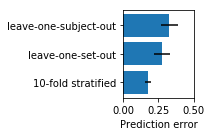

In [14]:
import matplotlib.pyplot as plt
clfs = list(scores3.keys())
errmeans = [1-np.mean(x) for x in scores3.values()]
errstds = [np.std(x) for x in scores3.values()]
y_pos = range(len(clfs))
plt.figure(figsize=(3,2))
plt.barh(y_pos,errmeans,xerr=errstds)
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(clfs)
plt.xlim(0,0.5)
plt.xlabel("Prediction error")
plt.tight_layout()
#plt.savefig("../reports/ecmlpkdd2018/figures/Q2T3.pdf")
plt.show()